In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
pd.set_option('html', False)
pd.set_option('max_columns', 30)
pd.set_option('max_rows',30)
plt.show()
import sys
sys.stdout.encoding 
u'\xf4'.encode('utf-8')
fLoc = "..\\RawText\\"
rLoc = "..\\Results\\"

#Load the Data

In [6]:
#Load data sets
fileStFrancisco = "https://raw.githubusercontent.com/uwescience/datasci_course_materials/master/assignment6/sanfrancisco_incidents_summer_2014.csv"
fileSeattle = "https://raw.githubusercontent.com/uwescience/datasci_course_materials/master/assignment6/seattle_incidents_summer_2014.csv"


In [7]:
dfSF = pd.read_csv(fileStFrancisco, sep=',')
dfSeatle = pd.read_csv(fileSeattle, sep=',')


C:\Users\Lula\Python27\lib\site-packages\IPython\core\interactiveshell.py:2871: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
print dfSF.columns
print dfSeatle.columns

Index([u'IncidntNum', u'Category', u'Descript', u'DayOfWeek', u'Date', u'Time',
       u'PdDistrict', u'Resolution', u'Address', u'X', u'Y', u'Location',
       u'PdId'],
      dtype='object')
Index([u'RMS CDW ID', u'General Offense Number', u'Offense Code',
       u'Offense Code Extension', u'Offense Type', u'Summary Offense Code',
       u'Summarized Offense Description', u'Date Reported',
       u'Occurred Date or Date Range Start', u'Occurred Date Range End',
       u'Hundred Block Location', u'District/Sector', u'Zone/Beat',
       u'Census Tract 2000', u'Longitude', u'Latitude', u'Location', u'Month',
       u'Year'],
      dtype='object')


In [57]:
cols=[x for x in dfSF.columns]
print cols
cols.pop(0)
lc=len(cols)
for x in range(lc):
    for y in range(x):
        print cols[x],cols[y]
        print dfSF[cols[x]].corr(dfSF[cols[y]],)
        

['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId', 'Hour']
Descript Category


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [46]:
dfSF.corr(method='spearman')

            IncidntNum         X         Y      PdId
IncidntNum    1.000000  0.020672  0.095959  1.000000
X             0.020672  1.000000  0.149866  0.020672
Y             0.095959  0.149866  1.000000  0.095959
PdId          1.000000  0.020672  0.095959  1.000000

In [21]:
len(dfSF['Category'])
# dfSF['Location'].describe()


28993

In [40]:
dfSF['Hour'] = [x[0] for x in dfSF['Time'].str.split(':')]
dfSF

       IncidntNum                     Category  \
0       140734311                        ARSON   
1       140736317                 NON-CRIMINAL   
2       146177923                LARCENY/THEFT   
3       146177531                LARCENY/THEFT   
4       140734220                 NON-CRIMINAL   
5       140734349                DRUG/NARCOTIC   
6       140734349                DRUG/NARCOTIC   
7       140734349  DRIVING UNDER THE INFLUENCE   
8       140738147               OTHER OFFENSES   
9       140734258                     TRESPASS   
10      140738711                VEHICLE THEFT   
11      146178410                LARCENY/THEFT   
12      140787570                 NON-CRIMINAL   
13      140735604                VEHICLE THEFT   
14      140738147                VEHICLE THEFT   
...           ...                          ...   
28978   140605461               OTHER OFFENSES   
28979   140626865                LARCENY/THEFT   
28980   140626865                LARCENY/THEFT   


##CST Lemmatiser

            CST       std
5000   0.641881  0.008516
7500   0.683342  0.011192
10000  0.687756  0.008466
15000  0.714136  0.004782
20000  0.761902  0.010309
25000  0.779821  0.010176
30000  0.778823  0.010893
35000  0.786915  0.004448
[0.6418812401471361, 0.68334209143457691, 0.68775617446137682, 0.71413557540725159, 0.76190225959012081, 0.77982133473462945, 0.77882291119285341, 0.78691539674198641]
[(0.63545951913921195, 0.64830296115506025), (0.67490255870044047, 0.69178162416871336), (0.68137234004373981, 0.69414000887901384), (0.71052997246454341, 0.71774117834995976), (0.7541285010856279, 0.76967601809461372), (0.7721481021038713, 0.78749456736538759), (0.77060918248411658, 0.78703663990159023), (0.78356133673307748, 0.79026945675089533)]


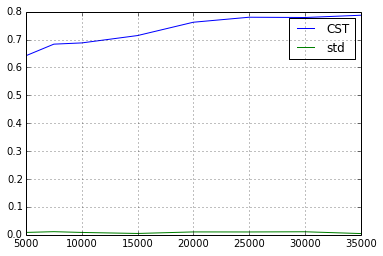

In [3]:
#Load Saved Statistics (..\Rawtext\CST-Trend-IsiXhosa-Results.text)
cst_results_file = file(fLoc+ "CST-Trend-IsiXhosa-Results.valTF.text")
str_cst_results = cst_results_file.read()
cst_results = eval(str_cst_results)
# print cst_results
#Calculate means and standard deviations
cstblindMeans = [ np.mean(x) for x in cst_results["blindAccMatrix"] ]
cstblindStd = [ np.std(x) for x in cst_results["blindAccMatrix"] ]
Acc = pd.DataFrame(cstblindMeans,index=cst_results["trainSize"], columns=['CST'])
Acc['std']=cstblindStd
print Acc
Acc.plot()
#Blind TF
cstblindTFMeans = [ np.mean(x) for x in cst_results["blindTFAccMatrix"] ]
cstblindTFStd = [ np.std(x) for x in cst_results["blindTFAccMatrix"] ]
#Calculate Confidence interval for 95% confidence
# cstCIs = [stats.norm.interval(0.95, loc=cstblindMeans[i], scale=cstblindStd[i]) for i in range(len(cstblindMeans))]
cstCIs = [mean_confidence_interval(i)[1:] for i in cst_results["blindAccMatrix"]]
print cstblindMeans
print cstCIs

##Lemmagen Lemmatiser

In [4]:
#Load Saved Statistics (..\Rawtext\LemmaGen-Trend-IsiXhosa-Results.text)
lg_results_file = file(fLoc+ "LemmaGen-Trend-IsiXhosa-Results.valTF.text")
str_lg_results = lg_results_file.read()
lg_results = eval(str_lg_results)
# print cst_results
#Calculate means and standard deviations
lgblindMeans = [ np.mean(x) for x in lg_results["blindAccMatrix"] ]
lgblindStd = [ np.std(x) for x in lg_results["blindAccMatrix"] ]

#Calculate means and standard deviations
lgblindTFMeans = [ np.mean(x) for x in lg_results["blindTFAccMatrix"] ]
lgblindTFStd = [ np.std(x) for x in lg_results["blindTFAccMatrix"] ]
#Calculate Confidence interval for 95% confidence
# lgCIs = [stats.norm.interval(0.95, loc=lgblindMeans[i], scale=lgblindStd[i]) for i in range(len(lgblindMeans))]
lgCIs = [mean_confidence_interval(i)[1:] for i in lg_results["blindAccMatrix"]]
print lgblindMeans
print lgCIs

[0.6667892800840779, 0.71339989490278499, 0.72858644245927484, 0.74456121912769313, 0.79653179190751455, 0.81261166579085642, 0.81487125591171827, 0.83252758801891757]
[(0.66133476836707483, 0.67224379180108096), (0.70708182144384368, 0.7197179683617263), (0.72190353110923577, 0.73526935380931391), (0.74147941861290456, 0.7476430196424817), (0.7871352091668421, 0.80592837464818701), (0.80323448574805467, 0.82198884583365817), (0.80682437961923414, 0.8229181322042024), (0.83037871752134074, 0.83467645851649441)]


##XGL Lemmatiser

In [5]:
#Load Saved Statistics (..\Rawtext\XGL-Trend-IsiXhosa-Results.text)
xgl_results_file = file(fLoc+ "XGL-Trend-IsiXhosa-Results.valTF.text")
str_xgl_results = xgl_results_file.read()
xgl_results = eval(str_xgl_results)
# print cst_results
#Calculate means and standard deviations
xglblindMeans = [ np.mean(x) for x in xgl_results["blindAccMatrix"] ]
xglblindStd = [ np.std(x) for x in xgl_results["blindAccMatrix"] ]

#Calculate means and standard deviations
xglblindTFMeans = [ np.mean(x) for x in xgl_results["blindTFAccMatrix"] ]
xglblindTFStd = [ np.std(x) for x in xgl_results["blindTFAccMatrix"] ]
# xglCIs = [stats.norm.interval(0.95, loc=xglblindMeans[i], scale=xglblindStd[i]) for i in range(len(xglblindMeans))]
xglCIs = [mean_confidence_interval(i)[1:] for i in xgl_results["blindAccMatrix"]]
print xglblindMeans
print xglCIs

[0.67966368891224382, 0.70578034682080926, 0.73168681029952709, 0.75638465580662118, 0.80420388859695213, 0.82800840777719387, 0.82900683131897002, 0.84561219127693121]
[(0.67341558520145606, 0.68591179262303159), (0.70201102667873994, 0.70954966696287858), (0.72557848013955217, 0.73779514045950201), (0.75173591788380134, 0.76103339372944101), (0.7971107884338553, 0.81129698876004896), (0.82082763941376224, 0.83518917614062549), (0.82190930543624174, 0.83610435720169829), (0.84302717346000544, 0.84819720909385699)]


##Accuracy rates on Testing Set

            CST  LemmaGen       XGL
5000   0.641881  0.666789  0.679664
7500   0.683342  0.713400  0.705780
10000  0.687756  0.728586  0.731687
15000  0.714136  0.744561  0.756385
20000  0.761902  0.796532  0.804204
25000  0.779821  0.812612  0.828008
30000  0.778823  0.814871  0.829007
35000  0.786915  0.832528  0.845612


C:\Python27\lib\site-packages\matplotlib\axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


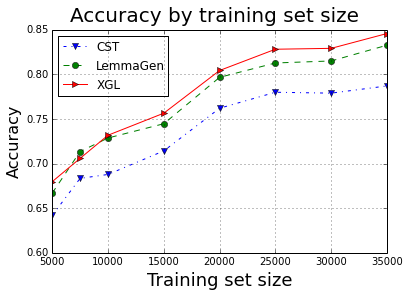

In [6]:

trainSize = cst_results["trainSize"]
fig = plt.figure()
fig.suptitle('Accuracy by training set size', fontsize=20)
plt.xlabel('Training set size', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.legend( loc='upper left', numpoints = 1 )

Acc = pd.DataFrame(cstblindMeans,index=trainSize, columns=['CST'])
Acc['LemmaGen'] = lgblindMeans
Acc['XGL'] = xglblindMeans
print Acc

plt.plot(trainSize,cstblindMeans,"b-.v", label='CST',)
plt.plot(trainSize,lgblindMeans,"g--o",label='LemmaGen',)
plt.plot(trainSize,xglblindMeans,"r->",label='XGL' )
plt.legend( loc='upper left', numpoints = 1 )
plt.grid(True)
plt.savefig(rLoc+"CST-LG-XGL-Acc-val.png")

##Accuracy Rates on General Set

            CST  LemmaGen       XGL
5000   0.562188  0.396568  0.435988
7500   0.584154  0.436855  0.475750
10000  0.620432  0.465167  0.503690
15000  0.658506  0.519289  0.557632
20000  0.695905  0.558596  0.597300
25000  0.716976  0.585849  0.619297
30000  0.735914  0.616112  0.647195
35000  0.753485  0.642606  0.668795


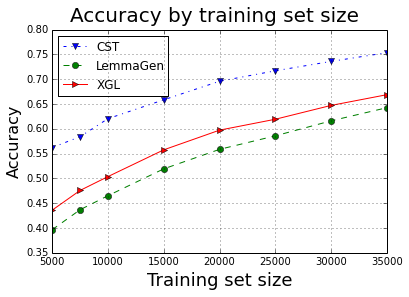

In [7]:

trainSize = cst_results["trainSize"]
fig = plt.figure()
fig.suptitle('Accuracy by training set size', fontsize=20)
plt.xlabel('Training set size', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.legend( loc='upper left', numpoints = 1 )

Acc = pd.DataFrame(cstblindTFMeans,index=trainSize, columns=['CST'])
Acc['LemmaGen'] = lgblindTFMeans
Acc['XGL'] = xglblindTFMeans
print Acc
plt.plot(trainSize,cstblindTFMeans,"b-.v", label='CST',)
plt.plot(trainSize,lgblindTFMeans,"g--o",label='LemmaGen',)
plt.plot(trainSize,xglblindTFMeans,"r->",label='XGL' )
plt.legend( loc='upper left', numpoints = 1 )
plt.grid(True)
plt.savefig(rLoc+"CST-LG-XGL-Acc-TF-val.png")

#CST Lemmatiser accuracy between the10-fold test and test corpus data

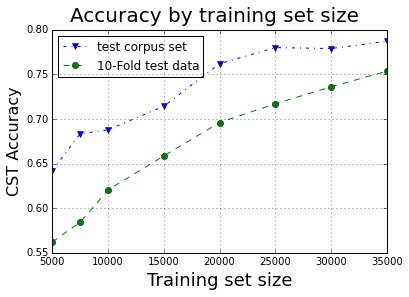

In [8]:

trainSize = cst_results["trainSize"]
fig = plt.figure()
fig.suptitle('Accuracy by training set size', fontsize=20)
plt.xlabel('Training set size', fontsize=18)
plt.ylabel('CST Accuracy', fontsize=16)
plt.legend( loc='upper left', numpoints = 1 )

plt.plot(trainSize,cstblindMeans,"b-.v", label='test corpus set',)
plt.plot(trainSize,cstblindTFMeans,"g--o",label='10-Fold test data',)
# plt.plot(trainSize,xglblindTFMeans,"r->",label='XGL' )
plt.legend( loc='upper left', numpoints = 1 )
plt.grid(True)
plt.savefig(rLoc+"CST-TFvsTestCorpus-Acc-val.png")

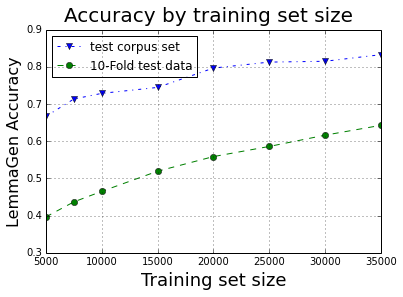

In [9]:

trainSize = cst_results["trainSize"]
fig = plt.figure()
fig.suptitle('Accuracy by training set size', fontsize=20)
plt.xlabel('Training set size', fontsize=18)
plt.ylabel('LemmaGen Accuracy', fontsize=16)
plt.legend( loc='upper left', numpoints = 1 )

plt.plot(trainSize,lgblindMeans,"b-.v", label='test corpus set',)
plt.plot(trainSize,lgblindTFMeans,"g--o",label='10-Fold test data',)
# plt.plot(trainSize,xglblindTFMeans,"r->",label='XGL' )
plt.legend( loc='upper left', numpoints = 1 )
plt.grid(True)
plt.savefig(rLoc+"LemmaGen-TFvsTestCorpus-Acc-val.png")

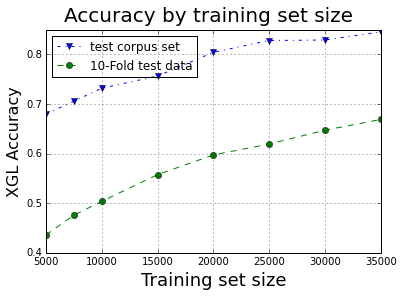

In [10]:

trainSize = cst_results["trainSize"]
fig = plt.figure()
fig.suptitle('Accuracy by training set size', fontsize=20)
plt.xlabel('Training set size', fontsize=18)
plt.ylabel('XGL Accuracy', fontsize=16)
plt.legend( loc='upper left', numpoints = 1 )

plt.plot(trainSize,xglblindMeans,"b-.v", label='test corpus set',)
plt.plot(trainSize,xglblindTFMeans,"g--o",label='10-Fold test data',)
# plt.plot(trainSize,xglblindTFMeans,"r->",label='XGL' )
plt.legend( loc='upper left', numpoints = 1 )
plt.grid(True)
plt.savefig(rLoc+"XGL-TFvsTestCorpus-Acc-val.png")

##F-Measure on Testing Set

            CST  LemmaGen       XGL
5000   0.438382  0.503145  0.638200
7500   0.477119  0.532425  0.645264
10000  0.482835  0.538716  0.651771
15000  0.511242  0.548065  0.661735
20000  0.579488  0.618201  0.717204
25000  0.598079  0.640563  0.738852
30000  0.605595  0.642881  0.727322
35000  0.615424  0.656391  0.733435
       XGL-LemmaGen  LemmaGen-CST   XGL-CST
5000       0.005062      0.005062  0.005062
7500       0.005062      0.005062  0.005062
10000      0.005062      0.005062  0.005062
15000      0.005062      0.005062  0.005062
20000      0.005062      0.005062  0.005062
25000      0.005062      0.005062  0.005062
30000      0.005062      0.005062  0.005062
35000      0.005062      0.005062  0.005062


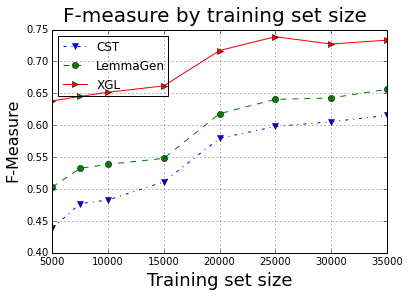

In [11]:
trainSize = cst_results["trainSize"]
fig = plt.figure()
fig.suptitle('F-measure by training set size', fontsize=20)
plt.xlabel('Training set size', fontsize=18)
plt.ylabel('F-Measure', fontsize=16)
plt.legend( loc='upper left', numpoints = 1 )

xglfMeasureMean= [ np.mean(x) for x in xgl_results["fMeasureMatrix"] ]
cstfMeasureMean= [ np.mean(x) for x in cst_results["fMeasureMatrix"] ]
lgfMeasureMean= [ np.mean(x) for x in lg_results["fMeasureMatrix"] ]
FMeasure = pd.DataFrame(cstfMeasureMean,index=trainSize, columns=['CST'])
FMeasure['LemmaGen'] = lgfMeasureMean
FMeasure['XGL'] = xglfMeasureMean
print FMeasure

plt.plot(trainSize,cstfMeasureMean,"b-.v", label='CST',)
plt.plot(trainSize,lgfMeasureMean,"g--o",label='LemmaGen',)
plt.plot(trainSize,xglfMeasureMean,"r->",label='XGL' )
plt.legend( loc='upper left', numpoints = 1 )
plt.grid(True)
plt.savefig(rLoc+"CST-LG-XGL-F-val.png")
wilc_XGL_CST = [wilcoxon(xgl_results["fMeasureMatrix"][i],cst_results["fMeasureMatrix"][i]) for i in range(len(trainSize))]
# print "wilc_XGL_CST :%s" % [(i[0],i[1]) for i in wilc_XGL_CST]
wilc_XGL_LG = [wilcoxon(xgl_results["fMeasureMatrix"][i],lg_results["fMeasureMatrix"][i]) for i in range(len(trainSize))]
# print "wilc_XGL_LG :%s" % [(i[0],i[1]) for i in wilc_XGL_LG]
wilc_CST_LG = [wilcoxon(cst_results["fMeasureMatrix"][i],lg_results["fMeasureMatrix"][i]) for i in range(len(trainSize))]
# print "wilc_CST_LG :%s" % [(i[0],i[1]) for i in wilc_CST_LG]

FWilcoxon = pd.DataFrame([i[1] for i in wilc_XGL_LG], index=trainSize, columns=['XGL-LemmaGen'])
FWilcoxon['LemmaGen-CST'] = [i[1] for i in wilc_CST_LG]
FWilcoxon['XGL-CST'] = [i[1] for i in wilc_XGL_CST]
print FWilcoxon

##F-Measure on General Set

            CST  LemmaGen       XGL
5000   0.525834  0.503321  0.624975
7500   0.548359  0.511190  0.650253
10000  0.556757  0.504006  0.659441
15000  0.591125  0.502065  0.678514
20000  0.611124  0.506110  0.686719
25000  0.623983  0.509874  0.687342
30000  0.646332  0.524570  0.704177
35000  0.689370  0.601912  0.739169
       XGL-LemmaGen  LemmaGen-CST   XGL-CST
5000       0.005062      0.028417  0.005062
7500       0.005062      0.059336  0.005062
10000      0.005062      0.036658  0.005062
15000      0.005062      0.005062  0.005062
20000      0.005062      0.005062  0.005062
25000      0.005062      0.005062  0.006910
30000      0.005062      0.005062  0.005062
35000      0.005062      0.005062  0.005062


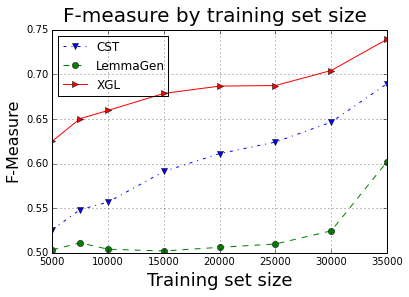

In [12]:
trainSize = cst_results["trainSize"]
fig = plt.figure()
fig.suptitle('F-measure by training set size', fontsize=20)
plt.xlabel('Training set size', fontsize=18)
plt.ylabel('F-Measure', fontsize=16)
plt.legend( loc='upper left', numpoints = 1 )

xglTFfMeasureMean= [ np.mean(x) for x in xgl_results["TFfMeasureMatrix"] ]
cstTFfMeasureMean= [ np.mean(x) for x in cst_results["TFfMeasureMatrix"] ]
lgTFfMeasureMean= [ np.mean(x) for x in lg_results["TFfMeasureMatrix"] ]

FMeasure = pd.DataFrame(cstTFfMeasureMean,index=trainSize, columns=['CST'])
FMeasure['LemmaGen'] = lgTFfMeasureMean
FMeasure['XGL'] = xglTFfMeasureMean
print FMeasure

plt.plot(trainSize,cstTFfMeasureMean,"b-.v", label='CST',)
plt.plot(trainSize,lgTFfMeasureMean,"g--o",label='LemmaGen',)
plt.plot(trainSize,xglTFfMeasureMean,"r->",label='XGL' )
plt.legend( loc='upper left', numpoints = 1 )
plt.grid(True)
plt.savefig(rLoc+"CST-LG-XGL-TF-F-val.png")

wilc_XGL_CST = [wilcoxon(xgl_results["TFfMeasureMatrix"][i],cst_results["TFfMeasureMatrix"][i]) for i in range(len(trainSize))]
# print "wilc_XGL_CST :%s" % [(i[0],i[1]) for i in wilc_XGL_CST]
wilc_XGL_LG = [wilcoxon(xgl_results["TFfMeasureMatrix"][i],lg_results["TFfMeasureMatrix"][i]) for i in range(len(trainSize))]
# print "wilc_XGL_LG :%s" % [(i[0],i[1]) for i in wilc_XGL_LG]
wilc_CST_LG = [wilcoxon(cst_results["TFfMeasureMatrix"][i],lg_results["TFfMeasureMatrix"][i]) for i in range(len(trainSize))]
# print "wilc_CST_LG :%s" % [(i[0],i[1]) for i in wilc_CST_LG]

FTFWilcoxon = pd.DataFrame([i[1] for i in wilc_XGL_LG], index=trainSize, columns=['XGL-LemmaGen'])
FTFWilcoxon['LemmaGen-CST'] = [i[1] for i in wilc_CST_LG]
FTFWilcoxon['XGL-CST'] = [i[1] for i in wilc_XGL_CST]
print FTFWilcoxon

##Known word accuracy on Testing Set

            CST  LemmaGen       XGL
5000   0.997366  0.990935  0.997366
7500   0.997720  0.995062  0.997720
10000  0.997882  0.995412  0.997882
15000  0.998043  0.989374  0.998043
20000  0.996444  0.991441  0.996444
25000  0.996584  0.991689  0.996584
30000  0.993468  0.988215  0.993468
35000  0.993133  0.989751  0.993133


C:\Python27\lib\site-packages\scipy\stats\morestats.py:1961: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


ValueError: failed to create intent(cache|hide)|optional array-- must have defined dimensions but got (0,)

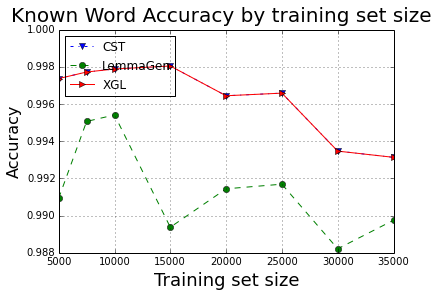

In [13]:
trainSize = xgl_results["trainSize"]
fig = plt.figure()
fig.suptitle('Known Word Accuracy by training set size', fontsize=20)
plt.xlabel('Training set size', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.legend( loc='upper left', numpoints = 1 )

xglKnowAccMean= [ np.mean(x) for x in xgl_results["knownAccMatrix"] ]
cstKnowAccMean= [ np.mean(x) for x in cst_results["knownAccMatrix"] ]
lgKnowAccMean= [ np.mean(x) for x in lg_results["knownAccMatrix"] ]

KnowAcc = pd.DataFrame(cstKnowAccMean,index=trainSize, columns=['CST'])
KnowAcc['LemmaGen'] = lgKnowAccMean
KnowAcc['XGL'] = xglKnowAccMean
print KnowAcc

plt.plot(trainSize,[ np.mean(x) for x in cst_results["knownAccMatrix"]],"b-.v", label='CST',)
plt.plot(trainSize,[ np.mean(x) for x in lg_results["knownAccMatrix"]],"g--o",label='LemmaGen',)
plt.plot(trainSize,[ np.mean(x) for x in xgl_results["knownAccMatrix"]],"r->",label='XGL' )
plt.legend( loc='upper left', numpoints = 1 )
plt.grid(True)
plt.savefig(rLoc+"CST-LG-XGL-Known-Acc-val.png")

wilc_XGL_CST = [wilcoxon(xgl_results["knownAccMatrix"][i],cst_results["knownAccMatrix"][i]) for i in range(len(trainSize))]
# print "wilc_XGL_CST :%s" % [(i[0],i[1]) for i in wilc_XGL_CST]
wilc_XGL_LG = [wilcoxon(xgl_results["knownAccMatrix"][i],lg_results["knownAccMatrix"][i]) for i in range(len(trainSize))]
# print "wilc_XGL_LG :%s" % [(i[0],i[1]) for i in wilc_XGL_LG]
wilc_CST_LG = [wilcoxon(cst_results["knownAccMatrix"][i],lg_results["knownAccMatrix"][i]) for i in range(len(trainSize))]
# print "wilc_CST_LG :%s" % [(i[0],i[1]) for i in wilc_CST_LG]

AccKnownWilcoxon = pd.DataFrame([i[1] for i in wilc_XGL_LG], index=trainSize, columns=['XGL-LemmaGen'])
AccKnownWilcoxon['LemmaGen-CST'] = [i[1] for i in wilc_CST_LG]
AccKnownWilcoxon['XGL-CST'] = [i[1] for i in wilc_XGL_CST]
print AccKnownWilcoxon

##Known Word Accuracy on General Set

In [ ]:
trainSize = xgl_results["trainSize"]
fig = plt.figure()
fig.suptitle('Known Word Accuracy by training set size', fontsize=20)
plt.xlabel('Training set size', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.legend( loc='upper left', numpoints = 1 )

xglTFKnowAccMean= [ np.mean(x) for x in xgl_results["knownTFAccMatrix"] ]
cstTFKnowAccMean= [ np.mean(x) for x in cst_results["knownTFAccMatrix"] ]
lgTFKnowAccMean= [ np.mean(x) for x in lg_results["knownTFAccMatrix"] ]

KnowAcc = pd.DataFrame(cstTFKnowAccMean,index=trainSize, columns=['CST'])
KnowAcc['LemmaGen'] = lgTFKnowAccMean
KnowAcc['XGL'] = xglTFKnowAccMean
print KnowAcc


plt.plot(trainSize,[ np.mean(x) for x in cst_results["knownTFAccMatrix"]],"b-.v", label='CST',)
plt.plot(trainSize,[ np.mean(x) for x in lg_results["knownTFAccMatrix"]],"g--o",label='LemmaGen',)
plt.plot(trainSize,[ np.mean(x) for x in xgl_results["knownTFAccMatrix"]],"r->",label='XGL' )
plt.legend( loc='upper left', numpoints = 1 )
plt.grid(True)
plt.savefig(rLoc+"CST-LG-XGL-Known-Acc-TF-val.png")

wilc_XGL_CST = [wilcoxon(xgl_results["knownTFAccMatrix"][i],cst_results["knownTFAccMatrix"][i]) for i in range(len(trainSize))]
# print "wilc_XGL_CST :%s" % [(i[0],i[1]) for i in wilc_XGL_CST]
wilc_XGL_LG = [wilcoxon(xgl_results["knownTFAccMatrix"][i],lg_results["knownTFAccMatrix"][i]) for i in range(len(trainSize))]
# print "wilc_XGL_LG :%s" % [(i[0],i[1]) for i in wilc_XGL_LG]
wilc_CST_LG = [wilcoxon(cst_results["knownTFAccMatrix"][i],lg_results["knownTFAccMatrix"][i]) for i in range(len(trainSize))]
# print "wilc_CST_LG :%s" % [(i[0],i[1]) for i in wilc_CST_LG]

AccKnownWilcoxon = pd.DataFrame([i[1] for i in wilc_XGL_LG], index=trainSize, columns=['XGL-LemmaGen'])
AccKnownWilcoxon['LemmaGen-CST'] = [i[1] for i in wilc_CST_LG]
AccKnownWilcoxon['XGL-CST'] = [i[1] for i in wilc_XGL_CST]
print AccKnownWilcoxon

##OoV Accuracy Rates on Testing Set

In [ ]:
trainSize = xgl_results["trainSize"]
fig = plt.figure()
fig.suptitle('OoV Word Accuracy by training set size', fontsize=20)
plt.xlabel('Training set size', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.legend( loc='upper left', numpoints = 1 )

xglunKnowAccMean= [ np.mean(x) for x in xgl_results["unknownAccMatrix"] ]
cstunKnowAccMean= [ np.mean(x) for x in cst_results["unknownAccMatrix"] ]
lgunKnowAccMean= [ np.mean(x) for x in lg_results["unknownAccMatrix"] ]

UnKnowAcc = pd.DataFrame(cstunKnowAccMean,index=trainSize, columns=['CST'])
UnKnowAcc['LemmaGen'] = lgunKnowAccMean
UnKnowAcc['XGL'] = xglunKnowAccMean
print UnKnowAcc

plt.plot(trainSize,[ np.mean(x) for x in cst_results["unknownAccMatrix"]],"b-.v", label='CST',)
plt.plot(trainSize,[ np.mean(x) for x in lg_results["unknownAccMatrix"]],"g--o",label='LemmaGen',)
plt.plot(trainSize,[ np.mean(x) for x in xgl_results["unknownAccMatrix"]],"r->",label='XGL' )
plt.legend( loc='upper left', numpoints = 1 )
plt.grid(True)
plt.savefig(rLoc+"CST-LG-XGL-OOV-Acc-val.png")

wilc_XGL_CST = [wilcoxon(xgl_results["unknownAccMatrix"][i],cst_results["unknownAccMatrix"][i]) for i in range(len(trainSize))]
# print "wilc_XGL_CST :%s" % [(i[0],i[1]) for i in wilc_XGL_CST]
wilc_XGL_LG = [wilcoxon(xgl_results["unknownAccMatrix"][i],lg_results["unknownAccMatrix"][i]) for i in range(len(trainSize))]
# print "wilc_XGL_LG :%s" % [(i[0],i[1]) for i in wilc_XGL_LG]
wilc_CST_LG = [wilcoxon(cst_results["unknownAccMatrix"][i],lg_results["unknownAccMatrix"][i]) for i in range(len(trainSize))]
# print "wilc_CST_LG :%s" % [(i[0],i[1]) for i in wilc_CST_LG]

AccUnKnownWilcoxon = pd.DataFrame([i[1] for i in wilc_XGL_LG], index=trainSize, columns=['XGL-LemmaGen'])
AccUnKnownWilcoxon['LemmaGen-CST'] = [i[1] for i in wilc_CST_LG]
AccUnKnownWilcoxon['XGL-CST'] = [i[1] for i in wilc_XGL_CST]
print AccUnKnownWilcoxon

#OoV Accuracy Rates on General Set

In [ ]:
trainSize = xgl_results["trainSize"]
fig = plt.figure()
fig.suptitle('OoV Word Accuracy by training set size', fontsize=20)
plt.xlabel('Training set size', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.legend( loc='upper left', numpoints = 1 )

xglunKnowAccMean= [ np.mean(x) for x in xgl_results["unknownTFAccMatrix"] ]
cstunKnowAccMean= [ np.mean(x) for x in cst_results["unknownTFAccMatrix"] ]
lgunKnowAccMean= [ np.mean(x) for x in lg_results["unknownTFAccMatrix"] ]

UnKnowAcc = pd.DataFrame(cstunKnowAccMean,index=trainSize, columns=['CST'])
UnKnowAcc['LemmaGen'] = lgunKnowAccMean
UnKnowAcc['XGL'] = xglunKnowAccMean
print UnKnowAcc

plt.plot(trainSize,[ np.mean(x) for x in cst_results["unknownTFAccMatrix"]],"b-.v", label='CST',)
plt.plot(trainSize,[ np.mean(x) for x in lg_results["unknownTFAccMatrix"]],"g--o",label='LemmaGen',)
plt.plot(trainSize,[ np.mean(x) for x in xgl_results["unknownTFAccMatrix"]],"r->",label='XGL' )
plt.legend( loc='upper left', numpoints = 1 )
plt.grid(True)
plt.savefig(rLoc+"CST-LG-XGL-OOV-Acc-TF-val.png")

wilc_XGL_CST = [wilcoxon(xgl_results["unknownTFAccMatrix"][i],cst_results["unknownTFAccMatrix"][i]) for i in range(len(trainSize))]
# print "wilc_XGL_CST :%s" % [(i[0],i[1]) for i in wilc_XGL_CST]
wilc_XGL_LG = [wilcoxon(xgl_results["unknownTFAccMatrix"][i],lg_results["unknownTFAccMatrix"][i]) for i in range(len(trainSize))]
# print "wilc_XGL_LG :%s" % [(i[0],i[1]) for i in wilc_XGL_LG]
wilc_CST_LG = [wilcoxon(cst_results["unknownTFAccMatrix"][i],lg_results["unknownTFAccMatrix"][i]) for i in range(len(trainSize))]
# print "wilc_CST_LG :%s" % [(i[0],i[1]) for i in wilc_CST_LG]
AccUnKnownWilcoxon = pd.DataFrame([i[1] for i in wilc_XGL_LG], index=trainSize, columns=['XGL-LemmaGen'])
AccUnKnownWilcoxon['LemmaGen-CST'] = [i[1] for i in wilc_CST_LG]
AccUnKnownWilcoxon['XGL-CST'] = [i[1] for i in wilc_XGL_CST]
print AccUnKnownWilcoxon

##Training Durations

In [ ]:
trainSize = xgl_results["trainSize"]
fig = plt.figure()
fig.suptitle('Training duration (ms/word) by training set size', fontsize=20)
plt.xlabel('Training set size', fontsize=18)
plt.ylabel('Duration (s)', fontsize=16)
plt.legend( loc='upper left', numpoints = 1 )
f = lambda x,y : x/y*1000
plt.plot(trainSize,map(f,[ np.mean(x) for x in cst_results["trainDurationMatrix"]],trainSize),"b-.v", label='CST',)
plt.plot(trainSize,map(f,[ np.mean(x) for x in lg_results["trainDurationMatrix"]],trainSize),"g--o",label='LemmaGen',)
plt.plot(trainSize,map(f,[ np.mean(x) for x in xgl_results["trainDurationMatrix"]],trainSize),"r->",label='XGL' )
plt.legend( loc='upper left', numpoints = 1 )
plt.grid(True)
plt.savefig(rLoc+"CST-LG-XGL-TrainDur-val.png")

xgltrainDurationMean= map(f,[ np.mean(x) for x in xgl_results["trainDurationMatrix"]],trainSize)
csttrainDurationMean= map(f,[ np.mean(x) for x in cst_results["trainDurationMatrix"]],trainSize)
lgtrainDurationMean= map(f,[ np.mean(x) for x in lg_results["trainDurationMatrix"]],trainSize)

UnKnowAcc = pd.DataFrame(csttrainDurationMean,index=trainSize, columns=['CST'])
UnKnowAcc['LemmaGen'] = lgtrainDurationMean
UnKnowAcc['XGL'] = xgltrainDurationMean
print UnKnowAcc

print i
print [1000./trainSize[3]*x for x in xgl_results["trainDurationMatrix"][3]]
wilc_XGL_CST = [wilcoxon([1000./trainSize[i]*x for x in xgl_results["trainDurationMatrix"][i]],[1000./trainSize[i]*x for x in cst_results["trainDurationMatrix"][i]]) for i in range(len(trainSize))]
# print "wilc_XGL_CST :%s" % [(i[0],i[1]) for i in wilc_XGL_CST]
wilc_XGL_LG = [wilcoxon([1000./trainSize[i]*x for x in xgl_results["trainDurationMatrix"][i]],[1000./trainSize[i]*x for x in lg_results["trainDurationMatrix"][i]]) for i in range(len(trainSize))]
# print "wilc_XGL_LG :%s" % [(i[0],i[1]) for i in wilc_XGL_LG]
wilc_CST_LG = [wilcoxon([1000./trainSize[i]*x for x in cst_results["trainDurationMatrix"][i]],[1000./trainSize[i]*x for x in lg_results["trainDurationMatrix"][i]]) for i in range(len(trainSize))]
# print "wilc_CST_LG :%s" % [(i[0],i[1]) for i in wilc_CST_LG]
TrainDurationWilcoxon = pd.DataFrame([i[1] for i in wilc_XGL_LG], index=trainSize, columns=['XGL-LemmaGen'])
TrainDurationWilcoxon['LemmaGen-CST'] = [i[1] for i in wilc_CST_LG]
TrainDurationWilcoxon['XGL-CST'] = [i[1] for i in wilc_XGL_CST]
print TrainDurationWilcoxon

In [ ]:
trainSize = xgl_results["trainSize"]
fig = plt.figure()
fig.suptitle('Training duration by training set size', fontsize=20)
plt.xlabel('Training set size', fontsize=18)
plt.ylabel('Duration (ms/word)', fontsize=16)
plt.legend( loc='upper left', numpoints = 1 )

f = lambda x,y : x/y*1000
# plt.plot(trainSize,map(f,[ np.mean(x) for x in cst_results["trainDurationMatrix"]],trainSize),"b-.v", label='CST',)
plt.plot(trainSize,map(f,[ np.mean(x) for x in lg_results["trainDurationMatrix"]],trainSize),"g--o",label='LemmaGen',)
plt.plot(trainSize,map(f,[ np.mean(x) for x in xgl_results["trainDurationMatrix"]],trainSize),"r->",label='XGL' )
plt.legend( loc='upper left', numpoints = 1 )
plt.grid(True)
plt.savefig(rLoc+"LG-XGL-TrainDur-val.png")

##Lemmatisation Durations

In [ ]:
trainSize = xgl_results["trainSize"]
fig = plt.figure()
fig.suptitle('Lemmatisation duration by training set size', fontsize=20)
plt.xlabel('Training set size', fontsize=18)
plt.ylabel('Duration (ms/word)', fontsize=16)
plt.legend( loc='upper left', numpoints = 1 )

f = lambda x,y : x/y*1000

plt.plot(trainSize,map(f,[ np.mean(x) for x in cst_results["lemmatiseDurationMatrix"]],[ np.mean(x) for x in cst_results['testSetSizeMatrix']]),"b-.v", label='CST',)
plt.plot(trainSize,map(f,[ np.mean(x) for x in lg_results["lemmatiseDurationMatrix"]],[ np.mean(x) for x in lg_results['testSetSizeMatrix']]),"g--o",label='LemmaGen',)
plt.plot(trainSize,map(f,[ np.mean(x) for x in xgl_results["lemmatiseDurationMatrix"]],[ np.mean(x) for x in xgl_results['testSetSizeMatrix']]),"r->",label='XGL' )
plt.legend( loc='upper left', numpoints = 1 )
plt.grid(True)
plt.savefig(rLoc+"CST-LG-XGL-LemDur-eval.png")

xgltrainDurationMean= map(f,[ np.mean(x) for x in xgl_results["lemmatiseDurationMatrix"]],[ np.mean(x) for x in xgl_results['testSetSizeMatrix']])
csttrainDurationMean= map(f,[ np.mean(x) for x in cst_results["lemmatiseDurationMatrix"]],[ np.mean(x) for x in cst_results['testSetSizeMatrix']])
lgtrainDurationMean= map(f,[ np.mean(x) for x in lg_results["lemmatiseDurationMatrix"]],[ np.mean(x) for x in lg_results['testSetSizeMatrix']])

UnKnowAcc = pd.DataFrame(csttrainDurationMean,index=trainSize, columns=['CST'])
UnKnowAcc['LemmaGen'] = lgtrainDurationMean
UnKnowAcc['XGL'] = xgltrainDurationMean
print UnKnowAcc

xglLDM = [map(f,xgl_results["lemmatiseDurationMatrix"][i],xgl_results['testSetSizeMatrix'][i]) for i in  range(len(trainSize))]
cstLDM = [map(f,cst_results["lemmatiseDurationMatrix"][i],cst_results['testSetSizeMatrix'][i]) for i in  range(len(trainSize))]
lgLDM = [map(f,lg_results["lemmatiseDurationMatrix"][i],lg_results['testSetSizeMatrix'][i]) for i in  range(len(trainSize))]
# print xglLDM
print [1000./trainSize[3]*x for x in xgl_results["lemmatiseDurationMatrix"][3]]
wilc_XGL_CST = [wilcoxon(xglLDM[i],cstLDM[i]) for i in range(len(trainSize))]
# print "wilc_XGL_CST :%s" % [(i[0],i[1]) for i in wilc_XGL_CST]
wilc_XGL_LG = [wilcoxon(xglLDM[i],lgLDM[i]) for i in range(len(trainSize))]
# print "wilc_XGL_LG :%s" % [(i[0],i[1]) for i in wilc_XGL_LG]
wilc_CST_LG = [wilcoxon(cstLDM[i],lgLDM[i]) for i in range(len(trainSize))]
# print "wilc_CST_LG :%s" % [(i[0],i[1]) for i in wilc_CST_LG]
lemmDurationWilcoxon = pd.DataFrame([i[1] for i in wilc_XGL_LG], index=trainSize, columns=['XGL-LemmaGen'])
lemmDurationWilcoxon['LemmaGen-CST'] = [i[1] for i in wilc_CST_LG]
lemmDurationWilcoxon['XGL-CST'] = [i[1] for i in wilc_XGL_CST]
print lemmDurationWilcoxon

In [ ]:
trainSize = xgl_results["trainSize"]
fig = plt.figure()
fig.suptitle('Lemmatisation duration by training set size', fontsize=20)
plt.xlabel('Training set size', fontsize=18)
plt.ylabel('Duration (us/word)', fontsize=16)
plt.legend( loc='upper left', numpoints = 1 )
f = lambda x,y : x/y*1000000

plt.plot(trainSize,map(f,[ np.mean(x) for x in cst_results["lemmatiseDurationMatrix"]],[ np.mean(x) for x in cst_results['testSetSizeMatrix']]),"b-.v", label='CST',)
plt.plot(trainSize,map(f,[ np.mean(x) for x in lg_results["lemmatiseDurationMatrix"]],[ np.mean(x) for x in lg_results['testSetSizeMatrix']]),"g--o",label='LemmaGen',)
# plt.plot(trainSize,map(f,[ np.mean(x) for x in xgl_results["lemmatiseDurationMatrix"]],[ np.mean(x) for x in xgl_results['testSetSizeMatrix']]),"r->",label='XGL' )
plt.legend( loc='upper left', numpoints = 1 )
plt.grid(True)
plt.savefig(rLoc+"CST-LG-LemDur-val.png")

##Training Memory

In [ ]:
trainSize = xgl_results["trainSize"]
fig = plt.figure()
fig.suptitle('Training Memory by training set size', fontsize=20)
plt.xlabel('Training set size', fontsize=18)
plt.ylabel('Memory (KB/w)', fontsize=16)
plt.legend( loc='upper left', numpoints = 1 )

f = lambda x,y : x/y

plt.plot(trainSize,map(f,[ np.mean(x) for x in cst_results["trainMemoryMatrix"]],trainSize),"b-.v", label='CST',)
plt.plot(trainSize,map(f,[ np.mean(x) for x in lg_results["trainMemoryMatrix"]],trainSize),"g--o",label='LemmaGen',)
plt.plot(trainSize,map(f,[ np.mean(x) for x in xgl_results["trainMemoryMatrix"]],trainSize),"r->",label='XGL' )
plt.legend( loc='upper left', numpoints = 1 )
plt.grid(True)
plt.savefig(rLoc+"CST-LG-XGL-TrainMemSize-val.png")


xgltrainMemoryMean= map(f,[ np.mean(x) for x in xgl_results["trainMemoryMatrix"]],[ np.mean(x) for x in trainSize])
csttrainMemoryMean= map(f,[ np.mean(x) for x in cst_results["trainMemoryMatrix"]],[ np.mean(x) for x in trainSize])
lgtrainMemoryMean= map(f,[ np.mean(x) for x in lg_results["trainMemoryMatrix"]],[ np.mean(x) for x in trainSize])

TrainMemory = pd.DataFrame(csttrainMemoryMean,index=trainSize, columns=['CST'])
TrainMemory['LemmaGen'] = lgtrainMemoryMean
TrainMemory['XGL'] = xgltrainMemoryMean
print TrainMemory

wilc_XGL_CST = [wilcoxon([1./trainSize[i]*x for x in xgl_results["trainMemoryMatrix"][i]],[1./trainSize[i]*x for x in cst_results["trainMemoryMatrix"][i]]) for i in range(len(trainSize))]
# print "wilc_XGL_CST :%s" % [(i[0],i[1]) for i in wilc_XGL_CST]
wilc_XGL_LG = [wilcoxon([1./trainSize[i]*x for x in xgl_results["trainMemoryMatrix"][i]],[1./trainSize[i]*x for x in lg_results["trainMemoryMatrix"][i]]) for i in range(len(trainSize))]
# print "wilc_XGL_LG :%s" % [(i[0],i[1]) for i in wilc_XGL_LG]
wilc_CST_LG = [wilcoxon([1./trainSize[i]*x for x in cst_results["trainMemoryMatrix"][i]],[1./trainSize[i]*x for x in lg_results["trainMemoryMatrix"][i]]) for i in range(len(trainSize))]
# print "wilc_CST_LG :%s" % [(i[0],i[1]) for i in wilc_CST_LG]
TrainMemoryWilcoxon = pd.DataFrame([i[1] for i in wilc_XGL_LG], index=trainSize, columns=['XGL-LemmaGen'])
TrainMemoryWilcoxon['LemmaGen-CST'] = [i[1] for i in wilc_CST_LG]
TrainMemoryWilcoxon['XGL-CST'] = [i[1] for i in wilc_XGL_CST]
print TrainMemoryWilcoxon

In [ ]:
trainSize = xgl_results["trainSize"]
fig = plt.figure()
fig.suptitle('Lemmatisation Memory by training set size', fontsize=20)
plt.xlabel('Training set size', fontsize=18)
plt.ylabel('Memory (KB/word)', fontsize=16)
plt.legend( loc='upper left', numpoints = 1 )


f = lambda x,y : x/y

plt.plot(trainSize,map(f,[ np.mean(x) for x in cst_results["lemmatiseMemoryMatrix"]],trainSize),"b-.v", label='CST',)
plt.plot(trainSize,map(f,[ np.mean(x) for x in lg_results["lemmatiseMemoryMatrix"]],trainSize),"g--o",label='LemmaGen',)
plt.plot(trainSize,map(f,[ np.mean(x) for x in xgl_results["lemmatiseMemoryMatrix"]],trainSize),"r->",label='XGL' )
plt.legend( loc='upper left', numpoints = 1 )
plt.grid(True)
plt.savefig(rLoc+"CST-LG-XGL-LemMem-val.png")


xglLemmMemoryMean= map(f,[ np.mean(x) for x in xgl_results["lemmatiseMemoryMatrix"]],[ np.mean(x) for x in trainSize])
cstLemmMemoryMean= map(f,[ np.mean(x) for x in cst_results["lemmatiseMemoryMatrix"]],[ np.mean(x) for x in trainSize])
lgLemmMemoryMean= map(f,[ np.mean(x) for x in lg_results["lemmatiseMemoryMatrix"]],[ np.mean(x) for x in trainSize])

TrainMemory = pd.DataFrame(cstLemmMemoryMean,index=trainSize, columns=['CST'])
TrainMemory['LemmaGen'] = lgLemmMemoryMean
TrainMemory['XGL'] = xglLemmMemoryMean
print TrainMemory

wilc_XGL_CST = [wilcoxon([1./trainSize[i]*x for x in xgl_results["lemmatiseMemoryMatrix"][i]],[1./trainSize[i]*x for x in cst_results["lemmatiseMemoryMatrix"][i]]) for i in range(len(trainSize))]
# print "wilc_XGL_CST :%s" % [(i[0],i[1]) for i in wilc_XGL_CST]
wilc_XGL_LG = [wilcoxon([1./trainSize[i]*x for x in xgl_results["lemmatiseMemoryMatrix"][i]],[1./trainSize[i]*x for x in lg_results["lemmatiseMemoryMatrix"][i]]) for i in range(len(trainSize))]
# print "wilc_XGL_LG :%s" % [(i[0],i[1]) for i in wilc_XGL_LG]
wilc_CST_LG = [wilcoxon([1./trainSize[i]*x for x in cst_results["lemmatiseMemoryMatrix"][i]],[1./trainSize[i]*x for x in lg_results["lemmatiseMemoryMatrix"][i]]) for i in range(len(trainSize))]
# print "wilc_CST_LG :%s" % [(i[0],i[1]) for i in wilc_CST_LG]
LemmMemoryWilcoxon = pd.DataFrame([i[1] for i in wilc_XGL_LG], index=trainSize, columns=['XGL-LemmaGen'])
LemmMemoryWilcoxon['LemmaGen-CST'] = [i[1] for i in wilc_CST_LG]
LemmMemoryWilcoxon['XGL-CST'] = [i[1] for i in wilc_XGL_CST]
print LemmMemoryWilcoxon

In [ ]:
trainSize = xgl_results["trainSize"]
fig = plt.figure()
fig.suptitle('Lemmatisation Memory by training set size', fontsize=20)
plt.xlabel('Training set size', fontsize=18)
plt.ylabel('Memory (KB/word)', fontsize=16)
plt.legend( loc='upper left', numpoints = 1 )

f = lambda x,y : x/y

plt.plot(trainSize,map(f,[ np.mean(x) for x in cst_results["lemmatiseMemoryMatrix"]],trainSize),"b-.v", label='CST',)
plt.plot(trainSize,map(f,[ np.mean(x) for x in lg_results["lemmatiseMemoryMatrix"]],trainSize),"g--o",label='LemmaGen',)
# plt.plot(trainSize,map(f,[ np.mean(x) for x in xgl_results["lemmatiseMemoryMatrix"]],trainSize),"r->",label='XGL' )

plt.legend( loc='upper left', numpoints = 1 )
plt.grid(True)
plt.savefig(rLoc+"CST-LG-LemMem-val.png")

##Calculating the t and p values using the Wilcoxon signed rank test

In [ ]:
from scipy.stats import wilcoxon
T_CSR_XGL=0
p_CSR_XGL = 0
# print xgl_results["blindAccMatrix"][7]
wilc_XGL_CST = [wilcoxon(xgl_results["blindAccMatrix"][i],cst_results["blindAccMatrix"][i]) for i in range(len(xgl_results["blindAccMatrix"]))]
# print "wilc_XGL_CST :%s" % [(i[0],i[1]) for i in wilc_XGL_CST]
wilc_XGL_LG = [wilcoxon(xgl_results["blindAccMatrix"][i],lg_results["blindAccMatrix"][i]) for i in range(len(xgl_results["blindAccMatrix"]))]
# print "wilc_XGL_LG :%s" % [(i[0],i[1]) for i in wilc_XGL_LG]
wilc_CST_LG = [wilcoxon(cst_results["blindAccMatrix"][i],lg_results["blindAccMatrix"][i]) for i in range(len(xgl_results["blindAccMatrix"]))]
# print "wilc_CST_LG :%s" % [(i[0],i[1]) for i in wilc_CST_LG]

AccWilcoxon = pd.DataFrame([i[1] for i in wilc_XGL_LG], index=trainSize, columns=['XGL-LemmaGen'])
AccWilcoxon['LemmaGen-CST'] = [i[1] for i in wilc_CST_LG]
AccWilcoxon['XGL-CST'] = [i[1] for i in wilc_XGL_CST]
print AccWilcoxon

In [ ]:
from scipy.stats import wilcoxon
T_CSR_XGL=0
p_CSR_XGL = 0
# print xgl_results["blindTFAccMatrix"][7]
wilc_XGL_CST = [wilcoxon(xgl_results["blindTFAccMatrix"][i],cst_results["blindTFAccMatrix"][i]) for i in range(len(xgl_results["blindAccMatrix"]))]
# print "wilc_XGL_CST :%s" % [(i[0],i[1]) for i in wilc_XGL_CST]
wilc_XGL_LG = [wilcoxon(xgl_results["blindTFAccMatrix"][i],lg_results["blindTFAccMatrix"][i]) for i in range(len(xgl_results["blindAccMatrix"]))]
# print "wilc_XGL_LG :%s" % [(i[0],i[1]) for i in wilc_XGL_LG]
wilc_CST_LG = [wilcoxon(cst_results["blindTFAccMatrix"][i],lg_results["blindTFAccMatrix"][i]) for i in range(len(xgl_results["blindAccMatrix"]))]
# print "wilc_CST_LG :%s" % [(i[0],i[1]) for i in wilc_CST_LG]
AccWilcoxonTF = pd.DataFrame([i[1] for i in wilc_XGL_CST], index=trainSize, columns=['CST-XGL'])
AccWilcoxonTF['LemmaGen-XGL'] = [i[1] for i in wilc_XGL_LG]
AccWilcoxonTF['LemmaGen-CST'] = [i[1] for i in wilc_CST_LG]
print AccWilcoxonTF

In [ ]:
from scipy.stats import f_oneway
T_CSR_XGL=0
p_CSR_XGL = 0
AccANOVA_XGL_CST_LG = [scipy.stats.f_oneway(xgl_results["blindAccMatrix"][i],cst_results["blindAccMatrix"][i],lg_results["blindAccMatrix"][i]) for i in range(len(xgl_results["blindAccMatrix"]))]
print [i[1] for i in AccANOVA_XGL_CST_LG]


In [ ]:
from scipy.stats import f_oneway
T_CSR_XGL=0
p_CSR_XGL = 0
AccANOVA_XGL_CST_LG_TF = [scipy.stats.f_oneway(xgl_results["blindTFAccMatrix"][i],cst_results["blindTFAccMatrix"][i],lg_results["blindTFAccMatrix"][i]) for i in range(len(trainSize))]


AccAnova = pd.DataFrame([i[1] for i in AccANOVA_XGL_CST_LG_TF], index=trainSize, columns=['Strict 10-Fold'])
AccAnova['Test Corpus'] = [i[1] for i in AccANOVA_XGL_CST_LG]
print AccAnova


##Analysis on the F-Measure ANOVA

In [ ]:
from scipy.stats import f_oneway
T_CSR_XGL=0
p_CSR_XGL = 0
FANOVA_XGL_CST_LG = [scipy.stats.f_oneway(xgl_results["fMeasureMatrix"][i],cst_results["fMeasureMatrix"][i],lg_results["fMeasureMatrix"][i]) for i in range(len(xgl_results["fMeasureMatrix"]))]
FANOVA_XGL_CST_LG_TF = [scipy.stats.f_oneway(xgl_results["TFfMeasureMatrix"][i],cst_results["TFfMeasureMatrix"][i],lg_results["TFfMeasureMatrix"][i]) for i in range(len(xgl_results["TFfMeasureMatrix"]))]
FAnova = pd.DataFrame([i[1] for i in FANOVA_XGL_CST_LG_TF], index=trainSize, columns=['Strict 10-Fold'])
FAnova['Test Corpus'] = [i[1] for i in FANOVA_XGL_CST_LG]
print FAnova
